In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objs as go

In [3]:
# Load the CSV file into a Pandas dataframe
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.set_index(df.columns[0], inplace=True)

In [5]:
# look at 5 row to gain initial thought regarding the data
df.head(10)

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
RowNumber                                                                     
1            15634602  Hargrave          619    France  Female   42       2   
2            15647311      Hill          608     Spain  Female   41       1   
3            15619304      Onio          502    France  Female   42       8   
4            15701354      Boni          699    France  Female   39       1   
5            15737888  Mitchell          850     Spain  Female   43       2   
6            15574012       Chu          645     Spain    Male   44       8   
7            15592531  Bartlett          822    France    Male   50       7   
8            15656148    Obinna          376   Germany  Female   29       4   
9            15792365        He          501    France    Male   44       4   
10           15592389        H?          684    France    Male   27       2   

             Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber                                                        
1               0.00              1          1               1   
2           83807.86              1          0               1   
3          159660.80              3          1               0   
4               0.00              2          0               0   
5          125510.82              1          1               1   
6          113755.78              2          1               0   
7               0.00              2          1               1   
8          115046.74              4          1               0   
9          142051.07              2          0               1   
10         134603.88              1          1               1   

           EstimatedSalary  Exited  
RowNumber                           
1                101348.88       1  
2                112542.58       0  
3                113931.57       1  
4                 93826.63       0  
5                 79084.10       0  
6                149756.71       1  
7                 10062.80       0  
8                119346.88       1  
9                 74940.50       0  
10                71725.73       0

In [6]:
#check missing values
missing_values = df.isna().sum()
print(missing_values)

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## It seems like we have clean data

In [7]:
# in order to know the dimensions
df=df.drop(['CustomerId','Surname'],axis=1)
df.shape

(10000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [9]:
df.corr()

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

In [10]:
percentages = round(df['Exited'].value_counts(normalize=True)*100,2)

# Define the bar plot
fig = go.Figure()
fig.add_trace(go.Bar(
    x=percentages.index,
    y=percentages.values,
    marker_color=['#87CEEB','#9370DB'],
    text=percentages.values,
    textposition='outside'
))

# Define the plot layout
fig.update_layout(
    title={
        'text': '<b> From the barplot of the distribution of Exited Status, it can be easily seen that we <br> \
have balance problem. So one of the balance problem techniques have to be done</b>',
        'y': 0.96,
        'x': 0.5
    },
    xaxis_title="Exit Status",
    yaxis_title="Percentages",
    yaxis_range=[0, 100],
    height=800,
    width=1000
)

fig.show()

In [11]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, subplot_titles=('Credit Score', 'Age', 'Balance', 'Estimated Salary'))

cols=['CreditScore','Age','Balance','EstimatedSalary']

colors = ['blue', 'red']

for i in range(4):
    row = (i // 2) + 1
    col = (i % 2) + 1
    hist1 = go.Histogram(x=df[df['Exited'] == 0][cols[i]], nbinsx=30, marker_color=colors[0], name='Not Exited')
    hist2 = go.Histogram(x=df[df['Exited'] == 1][cols[i]], nbinsx=30, marker_color=colors[1], name='Exited')
    fig.add_trace(hist1, row=row, col=col)
    fig.add_trace(hist2, row=row, col=col)

    fig.update_xaxes(title_text=cols[i], row=row, col=col)
    fig.update_yaxes(title_text='Count', row=row, col=col)

fig.update_layout(
    height=800, 
    width=1000,
    title={
        'text': '<b> Here are histograms of features separated by Exited status. From the age graph, it seems that<br>\
younger people tend to keep their customer loyalty. Only the shape of \
the estimated salary graph<br> is uniformly distributed.</b>',
        'y': 0.96,
        'x': 0.5
    }
)
fig.show()

In [12]:


fig = px.histogram(df, x="Age", color="Exited", nbins=60,
                   barmode="overlay", opacity=0.7,
                   labels={"Age": "Age", "Exited": "Exited"},
                   histnorm='probability density',
                   color_discrete_sequence=['red', 'blue'])

fig.update_layout(
    title={
        'text': "<b>This is density plot of Age seperated by Exited Status. This graph can provide valuable <br>insights for companies\
 in selecting target audience or in efforts to extend subscription durations. </b>",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Age",
    yaxis_title="Density",
    legend_title="Exited",
    bargap=0.1)

fig.update_traces(marker=dict(line=dict(width=1, color='Black')))
fig.show()

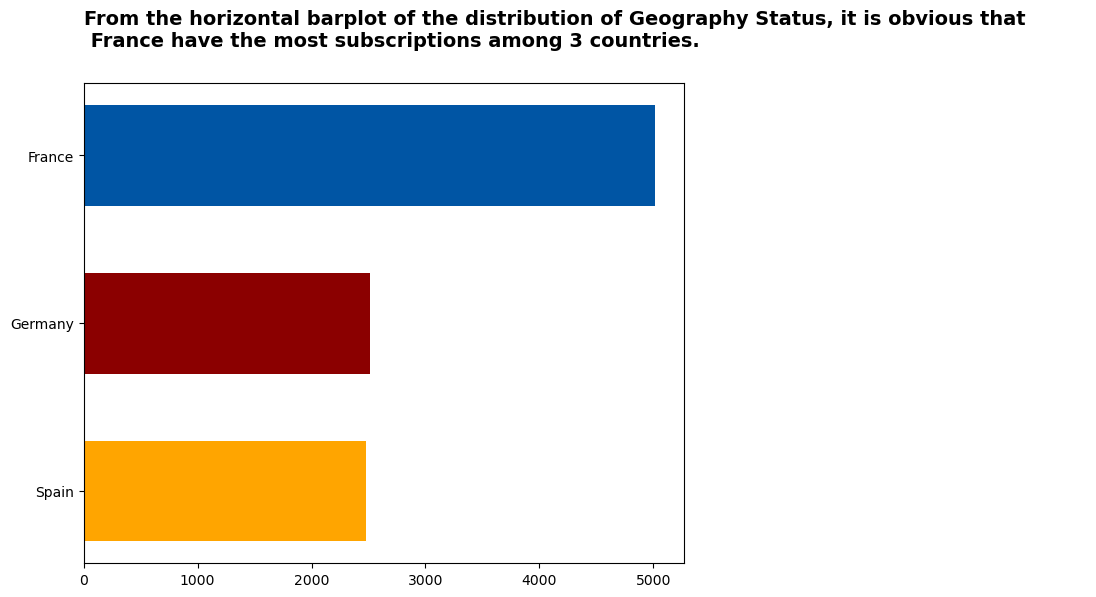

In [13]:
# create the horizontal barplot
plt.figure(figsize=(10,6))
frequencies = df['Geography'].value_counts()
plt.barh(frequencies.index[::-1], frequencies.values[::-1],color=['#FFA500','#8B0000','#0055A4'], height=0.6,align='center')

# add the text annotation
plt.text(0.5, 2.65, 'From the horizontal barplot of the distribution of Geography Status, it is obvious that         \n \
France have the most subscriptions among 3 countries.', ha='left', fontweight='bold',fontsize=14)

# move the plot to the left
ax = plt.gca()
ax.set_position([0.1, 0.1, 0.6, 0.8])

# display the plot
plt.show()

In [14]:
df['Exited_color'] = df['Exited'].map({0: 'Not Exited', 1: 'Exited'})

fig = px.scatter(df, x='Balance', y='CreditScore', color='Exited_color', opacity=0.9,
                 hover_data=['Balance', 'CreditScore', 'Exited'], 
                 title='Scatter Plot with CreditScore vs Balance and Colors based on Exited Column')

fig.update_traces(marker=dict(size=10 * np.random.rand(len(df)), line=dict(width=1, color='white')))
fig.update_layout(title={
    'text': "Scatter Plot with CreditScore vs Balance and Colors based on Exited Column",
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'})
fig.show()


## so we have 110000 data which means there may be not enough data in order to implement deep learning at first glance

In [15]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int', 'float'])

# Select string columns
str_cols = df.select_dtypes(include=['object','bool'])
print(num_cols.head())
print("-----------------------------------------------------------------------------------------------------")
print(str_cols.head())

           CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
RowNumber                                                                  
1                  619   42       2       0.00              1          1   
2                  608   41       1   83807.86              1          0   
3                  502   42       8  159660.80              3          1   
4                  699   39       1       0.00              2          0   
5                  850   43       2  125510.82              1          1   

           IsActiveMember  EstimatedSalary  Exited  
RowNumber                                           
1                       1        101348.88       1  
2                       1        112542.58       0  
3                       0        113931.57       1  
4                       0         93826.63       0  
5                       1         79084.10       0  
------------------------------------------------------------------------------------------------

In [16]:
column_types = df.dtypes
column_types

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Exited_color        object
dtype: object

## Label Encoding

In [17]:
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

## Solving balance problem

In [18]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = df[df['Exited'] == 0]
minority_class = df[df['Exited'] == 1]

# Upsample the minority class up to 3 times of the majority class
n_samples = len(minority_class) * 3
minority_upsampled = resample(minority_class, replace=True, n_samples=n_samples, random_state=42)

# Combine the upsampled minority class with the original majority class
df = pd.concat([majority_class, minority_upsampled])

## Correlation Graph

In [19]:
corr= df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].corr()

fig = px.imshow(corr,
                labels=dict(x='', y=''),
                x=['CreditScore', 'Age', 'Balance', 'EstimatedSalary'],
                y=['CreditScore', 'Age', 'Balance', 'EstimatedSalary'],
                color_continuous_scale='Oranges',
                width=800, height=600,
                zmin=-1, zmax=1)

# Add correlation values on top of the squares
annotations = []
for i, row in enumerate(corr.values):
    for j, value in enumerate(row):
        if i==j:
            annotations.append(dict(x=j, y=i, text=f'{value:.0f}', showarrow=False, font=dict(color='black', size=18)))
        else :
            annotations.append(dict(x=j, y=i, text=f'{value:.5f}', showarrow=False, font=dict(color='black', size=18)))
fig.update_layout(annotations=annotations)

fig.update_layout(title='<b>Correlation Heatmap of Major Features<b>',
                  title_font_size=20, title_x=0.5, title_y=0.95,
                  xaxis=dict(tickangle=-45,tickfont=dict(size=14)),
                  yaxis=dict(showticklabels=True,tickfont=dict(size=14)),
                 width=750, height=700)

fig.show()

In [20]:
df['Exited'].value_counts()

0    7963
1    6111
Name: Exited, dtype: int64

In [21]:
df=df.drop(['Exited_color'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['Exited'], test_size=0.25, random_state=42)

In [22]:
df_test = pd.concat([X_test, y_test], axis=1)
df_test.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  \
RowNumber                                                           
1759               642          1       0   30       5  129753.69   
214                676          0       0   34       1   63095.01   
4221               589          2       0   45       1       0.00   
9557               769          1       1   34       7  115101.50   
6201               850          1       0   31       3   51293.47   

           NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
RowNumber                                                                     
1759                   1          1               0           582.53       0  
214                    1          1               1         40645.81       0  
4221                   1          0               0        125939.22       1  
9557                   1          0               0         57841.89       1  
6201                   1          0               0         35534.68       0

## So we have almost balanced data 43.4% for 1, 56.6% for 0

# Standard Scaling for Models

In [23]:
from sklearn.preprocessing import StandardScaler

# Separate the label column and reset its index
label = df['Exited'].reset_index(drop=True)

# Drop the label column and reset the index of the remaining features
df_features = df.drop('Exited', axis=1).reset_index(drop=True)

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the dataframe using the scaler object
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Concatenate the label column back to the scaled features dataframe
df = pd.concat([df_scaled, label], axis=1)

## Importing Models split and others and split scaled data 

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Separate the features and target variable
X = df.drop(['Exited'], axis=1)
y = df['Exited']

X_train1, X_test1, y_train1, y_test1 = train_test_split(df.iloc[:,:-1], df['Exited'], test_size=0.25, random_state=42)

## Logistic Regression Model

In [25]:
# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train1, y_train1)

# Predict the target variable on the test set
y_pred1 = model.predict(X_test1)
# Calculate the accuracy score and confusion matrix
accuracy = accuracy_score(y_test1, y_pred1)
# Precision, recall, f1-score ve support metriklerini classification_report fonksiyonu ile hesaplayalım
print('Classification_Report')
print(classification_report(y_test1, y_pred1))
print('*****************************************************')
conf_matrix = confusion_matrix(y_test1, y_pred1)
print("Accuracy Score:", round(accuracy,3))

Classification_Report
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      2004
           1       0.67      0.57      0.62      1515

    accuracy                           0.70      3519
   macro avg       0.69      0.68      0.68      3519
weighted avg       0.69      0.70      0.69      3519

*****************************************************
Accuracy Score: 0.696


## Confusion Matrix with seaborn


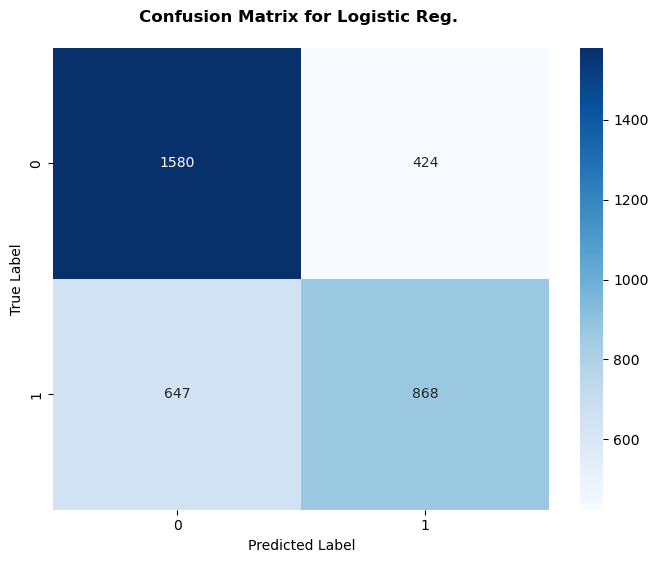

In [26]:
# Confusion matrixi confusion_matrix fonksiyonu ile hesaplayalım ve görselleştirelim
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label");
plt.title("Confusion Matrix for Logistic Reg. \n", fontweight="bold");

## ROC curve for Logistic Regression

AUC Score: 0.7558381586661661


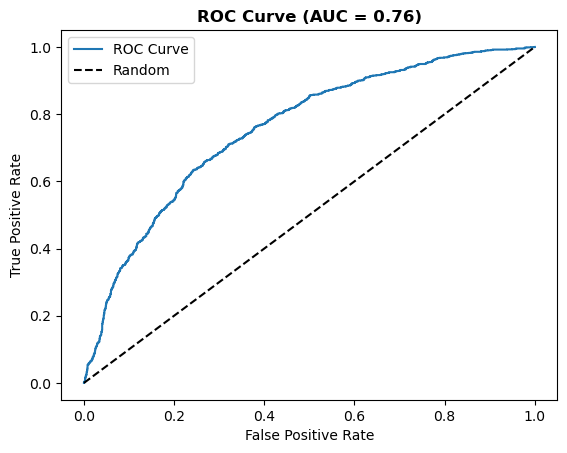

In [27]:
# ROC eğrisini ve AUC skorunu hesaplayalım
y_pred_proba = model.predict_proba(X_test1)[:,1]
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba)
auc_score = roc_auc_score(y_test1, y_pred_proba)
print("AUC Score:", auc_score)

# ROC eğrisini çizdirelim
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random") 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(auc_score), fontweight="bold")
plt.legend()


In [28]:
from matplotlib.colors import ListedColormap

# Modelimizi 10 sütunlu verilerimize uyduralım
model = LogisticRegression()
model.fit(X_train, y_train)

# Karar sınırını çizdirelim
X1, X2 = np.meshgrid(np.arange(start = X_train[:, 0].min() - 10, stop = X_train[:, 0].max() + 10, step = 1),
                     np.arange(start = X_train[:, 1].min() - 1000, stop = X_train[:, 1].max() + 1000, step = 1))
Z = model.predict(np.array([X1.ravel(), X2.ravel()] + [0]*8).T).reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Verilerimizi görselleştirelim
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title("Decision Boundary of Logistic Regression Model")
plt.xlabel("Balance")
plt.ylabel("Credit Score")
plt.legend()
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

## RandomForest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

# Random Forest modeli oluştur
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Test veri seti üzerinde tahmin yap
y_pred_rf = rf.predict(X_test)
# Model performansını değerlendir
print(classification_report(y_test, y_pred_rf))
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2004
           1       0.92      0.94      0.93      1515

    accuracy                           0.94      3519
   macro avg       0.94      0.94      0.94      3519
weighted avg       0.94      0.94      0.94      3519

Accuracy: 0.940892298948565
Precision: 0.9224305106658048
Recall: 0.9419141914191419
Confusion Matrix: [[1884  120]
 [  88 1427]]


## Confusion Matrix for RandomForest

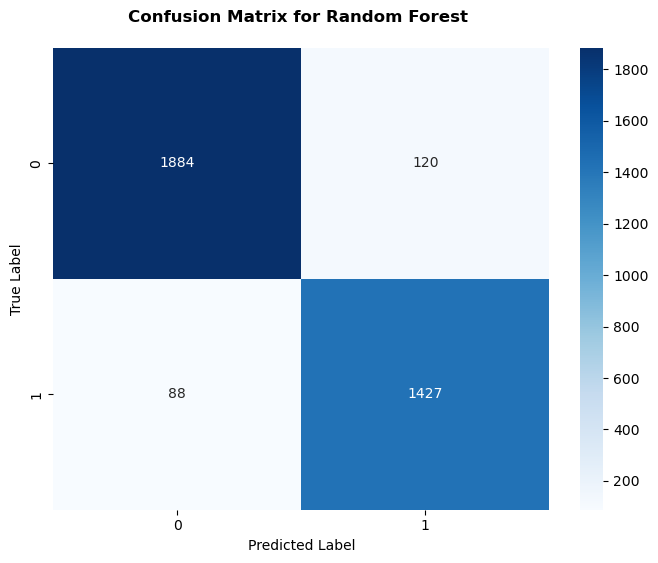

In [30]:
# Confusion matrixi confusion_matrix fonksiyonu ile hesaplayalım ve görselleştirelim
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label");
plt.title("Confusion Matrix for Random Forest \n", fontweight="bold");


## ROC curve for RandomForest

AUC Score: 0.9799233216734847


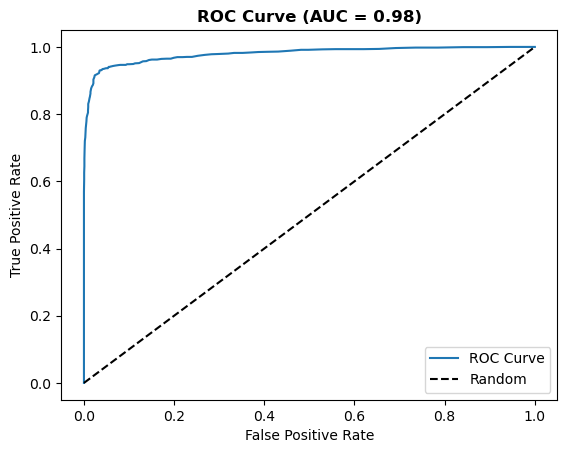

In [31]:
# ROC eğrisini ve AUC skorunu hesaplayalım
y_pred_proba_rf = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
auc_score = roc_auc_score(y_test, y_pred_proba_rf)
print("AUC Score:", auc_score)

# ROC eğrisini çizdirelim
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(auc_score), fontweight="bold")
plt.legend();



## Support Vector Classifier

In [32]:
from sklearn.svm import SVC

# Create the SVM classifier
clf = SVC(kernel='linear', C=1,probability=True)

# Train the classifier
clf.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred_svc = clf.predict(X_test1)

# Model performansını değerlendir
print('Accuracy:', accuracy_score(y_test1, y_pred_svc))
print('Precision:', precision_score(y_test1, y_pred_svc))
print('Recall:', recall_score(y_test1, y_pred_svc))


Accuracy: 0.6959363455527139
Precision: 0.6731517509727627
Recall: 0.570957095709571


## Confusion Matrix for SVM classifier

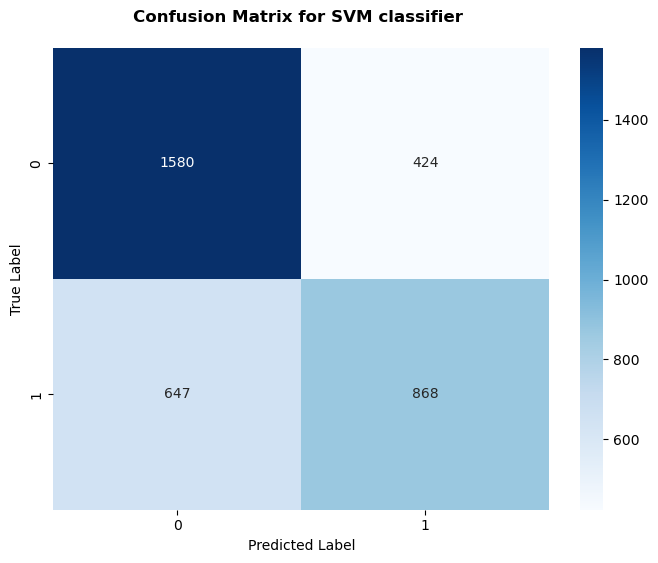

In [33]:
# Confusion matrixi confusion_matrix fonksiyonu ile hesaplayalım ve görselleştirelim
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label");
plt.title("Confusion Matrix for SVM classifier \n", fontweight="bold");

## SVM classifier ROC curve

AUC Score: 0.7570530556049617


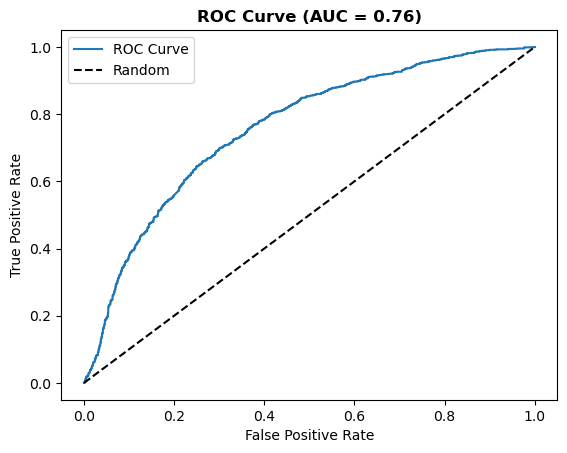

In [34]:
# ROC eğrisini ve AUC skorunu hesaplayalım
y_pred_proba_svc = clf.predict_proba(X_test1)[:,1]
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba_svc)
auc_score = roc_auc_score(y_test1, y_pred_proba_svc)
print("AUC Score:", auc_score)

# ROC eğrisini çizdirelim
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(auc_score), fontweight="bold")
plt.legend()



# Models with Hyperparameter Tuning

## Logistic Regression

In [35]:
from sklearn.pipeline import make_pipeline,Pipeline


pipeline = Pipeline(steps=[
     ('standardscaler', StandardScaler()),
     ('logistic', LogisticRegression())
])

pipeline.fit(X_train,y_train)
y_hat_pipe = pipeline.predict(X_test)


params = {'logistic__C': [0.001, 0.01, 0.1, 1],
          'logistic__penalty': ['l1','l2','elasticnet',None],
          'logistic__max_iter':[10, 50, 100]}     
pipe_grid = GridSearchCV(pipeline, param_grid=params, n_jobs=-1, cv=10)
pipe_grid.fit(X_train, y_train)
y_pred_pipe_grid=pipe_grid.predict(X_test)



In [36]:
print(pipe_grid.best_params_)

{'logistic__C': 0.01, 'logistic__max_iter': 10, 'logistic__penalty': 'l2'}


## Classification Report for Logistic Reg.

In [37]:
y_pred_pipe_grid = pipe_grid.predict(X_test)
print('Classification_Report')
print(classification_report(y_test, y_pred_pipe_grid))
print('*****************************************************')
print(accuracy)

Classification_Report
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      2004
           1       0.67      0.57      0.62      1515

    accuracy                           0.70      3519
   macro avg       0.69      0.68      0.68      3519
weighted avg       0.69      0.70      0.69      3519

*****************************************************
0.6956521739130435


## Confusion Matrix for Logistic Regression

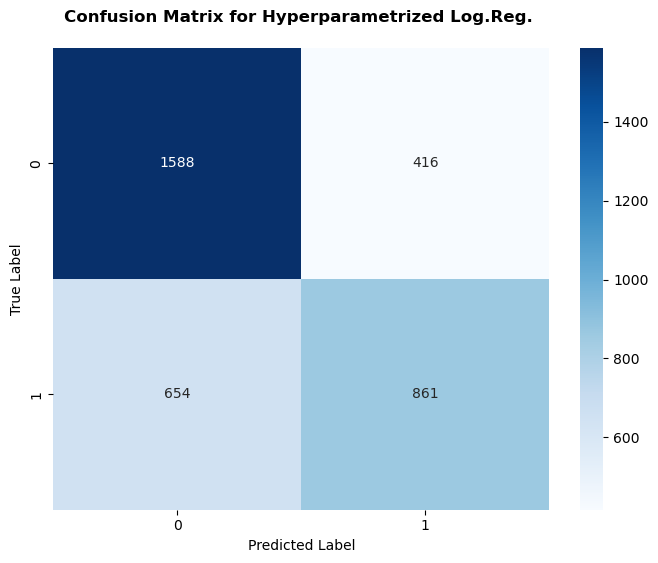

In [38]:
# Confusion matrixi confusion_matrix fonksiyonu ile hesaplayalım ve görselleştirelim
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_pipe_grid)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Hyperparametrized Log.Reg. \n", fontweight="bold");

## ROC Curve for Logistic Regression

AUC Score: 0.7558552861274153


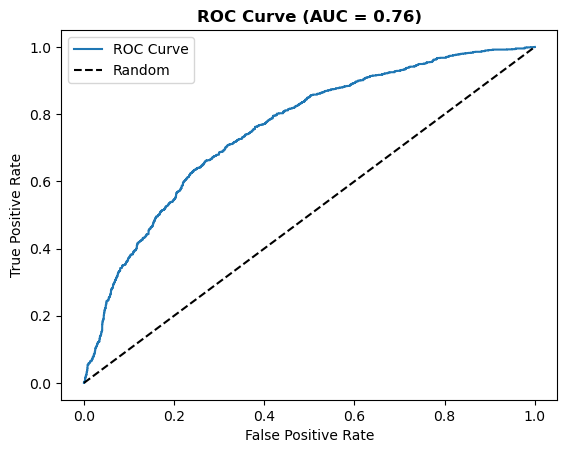

In [39]:
# ROC eğrisini ve AUC skorunu hesaplayalım
y_pred_pipe_grid_hyp_proba = pipe_grid.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_pipe_grid_hyp_proba)
auc_score = roc_auc_score(y_test, y_pred_pipe_grid_hyp_proba)
print("AUC Score:", auc_score)

# ROC eğrisini çizdirelim
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(auc_score), fontweight="bold")
plt.legend()



## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
     ('randomforest', RandomForestClassifier())
])
params = {'randomforest__criterion':['gini', 'entropy', 'log_loss'],
         'randomforest__max_depth':[2, 4, 6, None],
         'randomforest__n_estimators': [10, 50, 100]}
        
grid = GridSearchCV(pipeline, param_grid=params, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('randomforest',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforest__criterion': ['gini', 'entropy',
                                                     'log_loss'],
                         'randomforest__max_depth': [2, 4, 6, None],
                         'randomforest__n_estimators': [10, 50, 100]})

In [41]:
print(grid.best_params_)

{'randomforest__criterion': 'entropy', 'randomforest__max_depth': None, 'randomforest__n_estimators': 50}


## Classification Report for Random Forest

Accuracy: 0.9391872691105427
Precision: 0.9215813350615684
Recall: 0.9386138613861386
Confusion Matrix: [[1883  121]
 [  93 1422]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2004
           1       0.92      0.94      0.93      1515

    accuracy                           0.94      3519
   macro avg       0.94      0.94      0.94      3519
weighted avg       0.94      0.94      0.94      3519



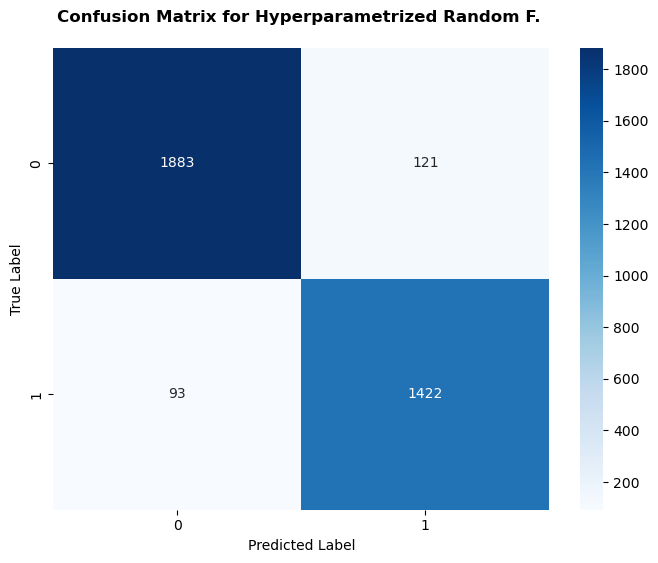

In [42]:
y_pred_grid = grid.predict(X_test);
# Model performansını değerlendir
print('Accuracy:', accuracy_score(y_test, y_pred_grid))
print('Precision:', precision_score(y_test, y_pred_grid))
print('Recall:', recall_score(y_test, y_pred_grid))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))
plt.figure(figsize=(8, 6));
cm = confusion_matrix(y_test, y_pred_grid);
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d");
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Hyperparametrized Random F. \n", fontweight="bold");


## ROC curve for Random Forest

AUC Score: 0.9782094227386812


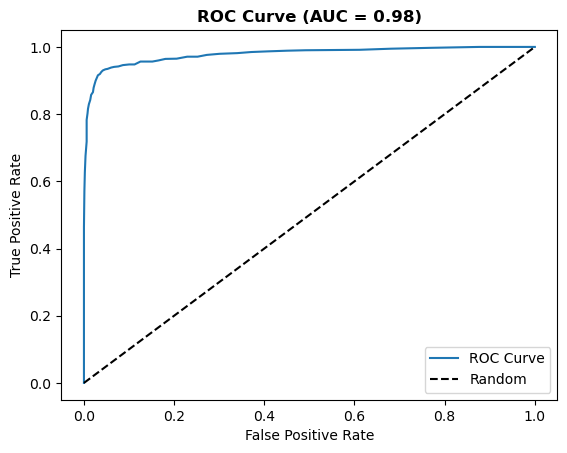

In [43]:
# ROC eğrisini ve AUC skorunu hesaplayalım
y_pred_proba_hyp_rf = grid.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_hyp_rf)
auc_score = roc_auc_score(y_test, y_pred_proba_hyp_rf)
print("AUC Score:", auc_score)

# ROC eğrisini çizdirelim
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(auc_score), fontweight="bold")
plt.legend()



## Support Vector Classifier

In [44]:
# Define your pipeline with a StandardScaler and an SVM classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True))
])

# Define the hyperparameters you want to tune
parameters = {
    'classifier__kernel': ['linear'],
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [0.1, 0.01]
}

# Define the GridSearchCV object
grid_search = GridSearchCV(pipeline, parameters, cv=10, n_jobs=-1)

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'classifier__C': 10, 'classifier__gamma': 0.1, 'classifier__kernel': 'linear'}
Best score:  0.7085738008042511


## Classification Report for SVC

Classification_Report
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      2004
           1       0.67      0.57      0.62      1515

    accuracy                           0.70      3519
   macro avg       0.69      0.68      0.68      3519
weighted avg       0.69      0.70      0.69      3519

*****************************************************
0.6956521739130435


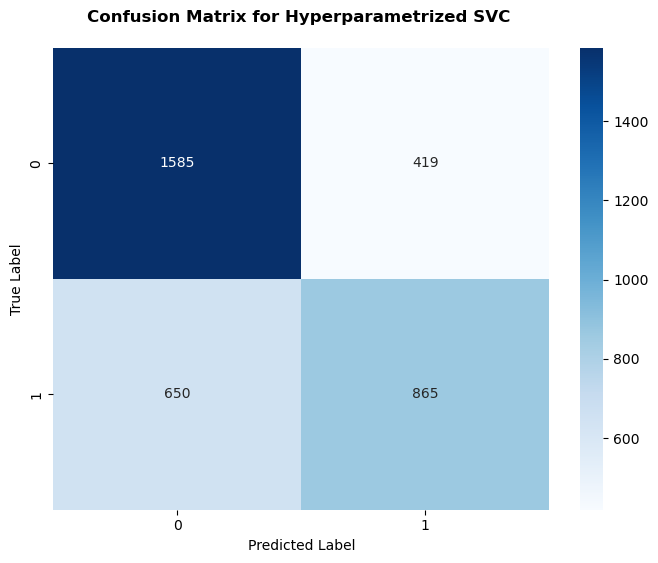

In [45]:
y_pred_grid_search = grid_search.predict(X_test)
# Confusion matrixi confusion_matrix fonksiyonu ile hesaplayalım ve görselleştirelim
print('Classification_Report')
print(classification_report(y_test, y_pred_grid_search))
print('*****************************************************')

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_grid_search)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Hyperparametrized SVC \n", fontweight="bold");
print(accuracy)

## ROC curve for SVC

AUC Score: 0.7570466328069932


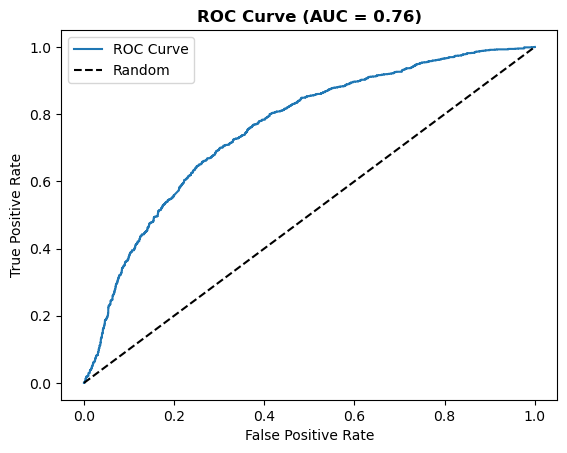

In [46]:
# ROC eğrisini ve AUC skorunu hesaplayalım
y_pred_proba_hyp_svc = grid_search.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_hyp_svc)
auc_score = roc_auc_score(y_test, y_pred_proba_hyp_svc)
print("AUC Score:", auc_score)

# ROC eğrisini çizdirelim
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(auc_score), fontweight="bold")
plt.legend()


In [47]:
df_test["logistic"] = y_pred1
df_test["proba_logistic"] = y_pred_proba

df_test["randomforest"] = y_pred_rf
df_test["proba_randomf"] = y_pred_proba_rf

df_test["svc"] = y_pred_svc
df_test["proba_svc"] = y_pred_proba_svc

df_test["hyp_logistic"] = y_pred_pipe_grid
df_test["proba_hyp_logistic"] = y_pred_pipe_grid_hyp_proba

df_test["hyp_random_forest"] = y_pred_grid
df_test["hyp_proba_randomf"] = y_pred_proba_hyp_rf

df_test["hyp_svc"] = y_pred_grid_search
df_test["hyp_proba_svc"] = y_pred_proba_hyp_svc

df_test.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  \
RowNumber                                                           
1759               642          1       0   30       5  129753.69   
214                676          0       0   34       1   63095.01   
4221               589          2       0   45       1       0.00   
9557               769          1       1   34       7  115101.50   
6201               850          1       0   31       3   51293.47   

           NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  ...  \
RowNumber                                                             ...   
1759                   1          1               0           582.53  ...   
214                    1          1               1         40645.81  ...   
4221                   1          0               0        125939.22  ...   
9557                   1          0               0         57841.89  ...   
6201                   1          0               0         35534.68  ...   

           randomforest  proba_randomf  svc  proba_svc  hyp_logistic  \
RowNumber                                                              
1759                  1           0.55    0   0.418083             0   
214                   0           0.11    0   0.242073             0   
4221                  1           0.99    1   0.598459             1   
9557                  1           0.79    0   0.346674             0   
6201                  0           0.36    0   0.313724             0   

           proba_hyp_logistic  hyp_random_forest  hyp_proba_randomf  hyp_svc  \
RowNumber                                                                      
1759                 0.456889                  0               0.50        0   
214                  0.241456                  0               0.12        0   
4221                 0.616955                  1               0.98        1   
9557                 0.369824                  1               0.64        0   
6201                 0.349259                  1               0.52        0   

           hyp_proba_svc  
RowNumber                 
1759            0.418272  
214             0.241957  
4221            0.598437  
9557            0.346832  
6201            0.313724  

[5 rows x 23 columns]

In [48]:
# CSV dosyasına dönüştürme
df_test.to_csv('test.csv', index=False)

In [49]:
df_test[df_test.isnull().any(axis=1) == True]


Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, logistic, proba_logistic, randomforest, proba_randomf, svc, proba_svc, hyp_logistic, proba_hyp_logistic, hyp_random_forest, hyp_proba_randomf, hyp_svc, hyp_proba_svc]
Index: []

[0 rows x 23 columns]